Epoch [1/10], Train Loss: 1.2153, Train Accuracy: 0.6613, Test Loss: 0.6938, Test Accuracy: 0.7990
Epoch [2/10], Train Loss: 0.4715, Train Accuracy: 0.8632, Test Loss: 0.4776, Test Accuracy: 0.8510
Epoch [3/10], Train Loss: 0.3790, Train Accuracy: 0.8892, Test Loss: 0.4954, Test Accuracy: 0.8310
Epoch [4/10], Train Loss: 0.3228, Train Accuracy: 0.9015, Test Loss: 0.4127, Test Accuracy: 0.8650
Epoch [5/10], Train Loss: 0.2810, Train Accuracy: 0.9163, Test Loss: 0.3965, Test Accuracy: 0.8810
Epoch [6/10], Train Loss: 0.2478, Train Accuracy: 0.9287, Test Loss: 0.3600, Test Accuracy: 0.8820
Epoch [7/10], Train Loss: 0.2383, Train Accuracy: 0.9275, Test Loss: 0.3554, Test Accuracy: 0.8890
Epoch [8/10], Train Loss: 0.2114, Train Accuracy: 0.9363, Test Loss: 0.3502, Test Accuracy: 0.8850
Epoch [9/10], Train Loss: 0.1883, Train Accuracy: 0.9450, Test Loss: 0.3408, Test Accuracy: 0.8820
Epoch [10/10], Train Loss: 0.1664, Train Accuracy: 0.9513, Test Loss: 0.3381, Test Accuracy: 0.9010


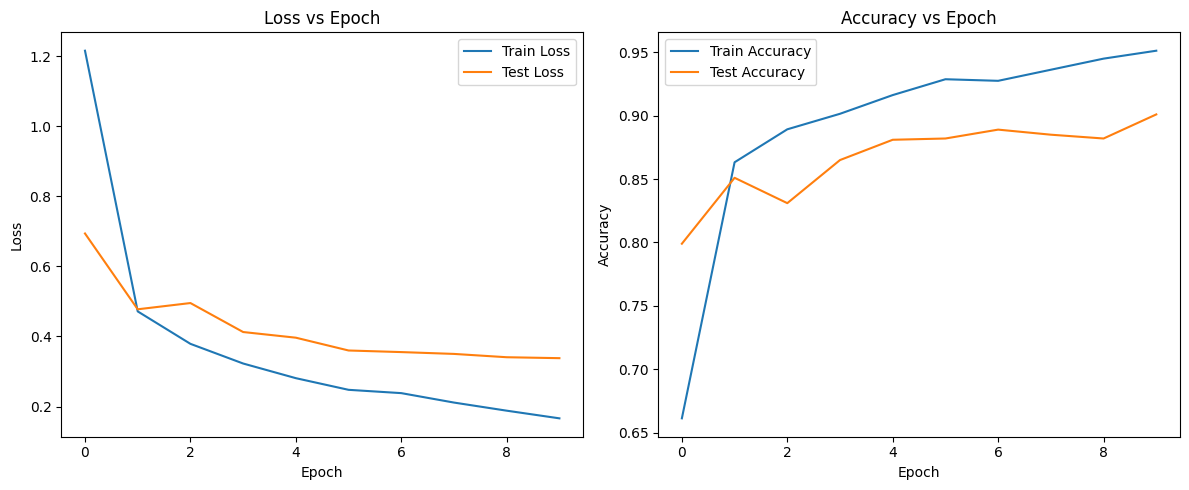

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Step 1: Load a Subset of the Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the full dataset
full_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
full_test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Limit the dataset to 5000 samples (4000 for training, 1000 for testing)
train_dataset = Subset(full_train_dataset, list(range(4000)))
test_dataset = Subset(full_test_dataset, list(range(1000)))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the Model
num_epochs = 10
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_accuracy = correct / total
    test_losses.append(epoch_loss)
    test_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epoch')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')

plt.tight_layout()
plt.show()
